In [1]:
import torch
from dpp_nets.my_torch.simulator import SimKDPP
from dpp_nets.my_torch.simulator import SimFilter

from dpp_nets.helper.plotting import plot_floats, plot_dict

In [4]:
# Learning a kDPP

# Initialization
network_params = {'set_size': 40, 'n_clusters': 10}
dtype = torch.DoubleTensor
train_it = 10000
batch_size = 10
lr = 1e-5
alpha_iter = 4

torch.manual_seed(10)
no_baseline = SimKDPP(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (no_baseline)')
print(50 * ' ')
torch.manual_seed(99)
no_baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (no_baseline)')
print(50 * ' ')
torch.manual_seed(0)
no_baseline.train(train_it, batch_size, lr, alpha_iter, False, 500)

# Evaluation 
print(50 * '-')
print('trained network (no_baseline):')
torch.manual_seed(99)
no_baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
no_baseline.random_benchmark(1000)

pre-training performance (no_baseline)
                                                  
Average Subset Size:  15.872999999999996
Subset Variance:  3.928870999999993
Average Loss 38.577
n_missed share 0.0007
n_one share 0.5424
n_many share 0.4569
n_perfect share 0.001
--------------------------------------------------
training (no_baseline)
                                                  


KeyboardInterrupt: 

In [5]:
torch.manual_seed(10)
baseline = SimKDPP(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (baseline)')
print(50 * ' ')
torch.manual_seed(99)
baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (baseline)')
print(50 * ' ')
torch.manual_seed(0)
baseline.train(train_it, batch_size, lr, alpha_iter, True)

# Evaluation 
print(50 * '-')
print('trained network (baseline):')
torch.manual_seed(99)
baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
baseline.random_benchmark(1000)

pre-training performance (baseline)
                                                  
Average Subset Size:  15.872999999999996
Subset Variance:  3.928870999999993
Average Loss 38.577
n_missed share 0.0007
n_one share 0.5424
n_many share 0.4569
n_perfect share 0.001
--------------------------------------------------
training (baseline)
                                                  
Loss at it  100  is:  24.6
Loss at it  200  is:  21.675
Loss at it  300  is:  14.7
Loss at it  400  is:  9.575000000000001
Loss at it  500  is:  7.175
Loss at it  600  is:  6.65
Loss at it  700  is:  4.175
Loss at it  800  is:  4.45
Loss at it  900  is:  3.425
Loss at it  1000  is:  5.1
Loss at it  1100  is:  3.1
Loss at it  1200  is:  2.075
Loss at it  1300  is:  2.325
Loss at it  1400  is:  1.875
Loss at it  1500  is:  1.45
Loss at it  1600  is:  1.7
Loss at it  1700  is:  2.325
Loss at it  1800  is:  1.025
Loss at it  1900  is:  0.7
Loss at it  2000  is:  1.0
Loss at it  2100  is:  1.3499999999999999


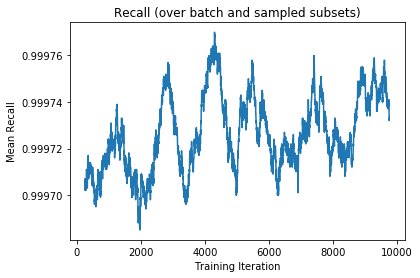

In [72]:
plot_floats(baseline.rec_dict,500, 'rec_kDPP', 'Recall (over batch and sampled subsets)', 'Training Iteration', 'Mean Recall')

In [ ]:
# Learning a kDPP

plot_floats(no_baseline.loss_dict,50,"no_baseline_loss_1e5_kDPP.pdf","Loss","Training Iteration", "Custom_Loss")
plot_floats(baseline.loss_dict,50,"baseline_loss_1e5_kDPP.pdf","Loss","Training Iteration", "Custom_Loss")

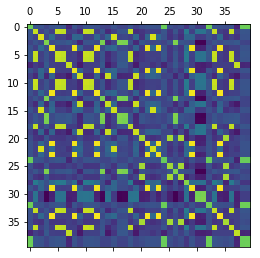

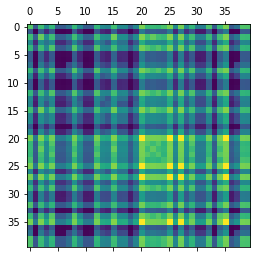

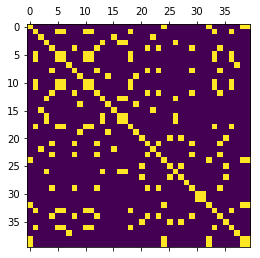

In [42]:
from dpp_nets.helper.plotting import plot_embd, gen_matrix_from_cluster_ix, plot_matrix
from torch.autograd import Variable
words, context, target = loaded.generate(1)
x = Variable(torch.cat([words, context],dim=2)).squeeze(0)
embd = baseline.kernel_net(x).data
plot_embd(x.data)
plot_embd(embd)
plot_matrix(gen_matrix_from_cluster_ix(target))

In [39]:
state_dict = torch.load('VIMCO_kDPP_10k_10k_10k.pt')

In [40]:
loaded = SimKDPP(network_params, dtype)

In [41]:
loaded.kernel_net.load_state_dict(state_dict)

In [51]:
import numpy as np
embd = words.numpy()
embd_copy = embd.copy()
index = target.numpy()
arg = np.argsort(index)
arg

array([[ 0, 32, 24, 38, 39, 22,  2, 15, 36, 33,  1, 18,  5,  6, 11, 10, 35,
        27, 25, 20, 13, 26,  3, 17, 16, 28, 19,  9, 14, 37,  7, 30, 31,  8,
        21, 34, 29, 12, 23,  4]])

In [63]:
print(index)
print(arg)

[[0 2 1 4 9 2 2 7 9 6 2 2 9 4 6 1 4 4 2 6 3 9 1 9 0 3 4 3 5 9 8 8 0 2 9 3 2
  7 0 0]]
[[ 0 32 24 38 39 22  2 15 36 33  1 18  5  6 11 10 35 27 25 20 13 26  3 17
  16 28 19  9 14 37  7 30 31  8 21 34 29 12 23  4]]


In [60]:
embd_copy = embd_copy.squeeze(0)
embd_copy[arg] =  embd

In [61]:
L = embd_copy.dot(embd_copy.T)
K = L.dot(np.linalg.inv(L + np.eye(40)))

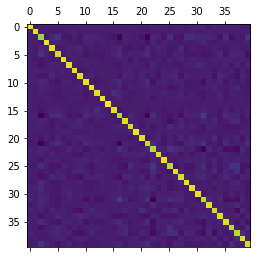

In [65]:
plot_matrix(K)

In [ ]:
# Learning a Filter - No Baseline

# Initialization
network_params = {'set_size': 40, 'n_clusters': 10, 'max_sig': 10}
dtype = torch.DoubleTensor
train_it = 5000
batch_size = 10
lr = 1e-5
alpha_iter = 4

torch.manual_seed(10)
no_baseline = SimFilter(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (no_baseline)')
print(50 * ' ')
torch.manual_seed(99)
no_baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (no_baseline)')
print(50 * ' ')
torch.manual_seed(0)
no_baseline.train(train_it, batch_size, lr, alpha_iter, False)

# Evaluation 
print(50 * '-')
print('trained network (no_baseline):')
torch.manual_seed(99)
no_baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
no_baseline.random_benchmark(1000)

In [ ]:
# Learning a Filter - Baseline

# Initialization

torch.manual_seed(10)
baseline = SimFilter(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (baseline)')
print(50 * ' ')
torch.manual_seed(99)
baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (baseline)')
print(50 * ' ')
torch.manual_seed(0)
baseline.train(train_it, batch_size, lr, alpha_iter, True)

# Evaluation 
print(50 * '-')
print('trained network (baseline):')
torch.manual_seed(99)
baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
baseline.random_benchmark(1000)

In [ ]:
plot_floats(baseline.loss_dict,20)

In [ ]:
torch.manual_seed(22)
no_baseline.train(train_it, batch_size, lr, alpha_iter, False)
torch.manual_seed(22)
baseline.train(train_it, batch_size, lr, alpha_iter, True)



In [ ]:
torch.manual_seed(99)
no_baseline.evaluate(1000)
torch.manual_seed(99)
baseline.evaluate(1000)

In [ ]:
from dpp_nets.my_torch.simulator import SimKDPPDeepSet
import torch
network_params = {'set_size': 40, 'n_clusters': 10}
dtype = torch.DoubleTensor
sim = SimKDPPDeepSet(network_params, dtype)

train_iter = 1000
batch_size = 10
lr = 1e-3
alpha_iter=5
baseline=True
reg=0
reg_mean=0

sim.train(train_iter, batch_size, lr, alpha_iter, baseline, reg, reg_mean)



In [3]:
import torch
torch.sin(torch.arange(0,10))


 0.0000
 0.8415
 0.9093
 0.1411
-0.7568
-0.9589
-0.2794
 0.6570
 0.9894
 0.4121
[torch.FloatTensor of size 10]